# 데이터 가져오기

In [98]:
import os
import re
import pandas as pd

In [125]:
# 하나로 모으기
path = './KEMDy20_v1_1/wav'
folders = os.listdir(path)

files = []
for folder in folders:
    for file in os.listdir(os.path.join(path, folder)):
        files.append(os.path.join(path, folder, file))

print(len(files))

26924


In [131]:
# 남자, 여자 분리하기
F_files = []
M_files = []

for file in files:
    if 'F' in file:
        F_files.append(file)
    else:
        M_files.append(file)

In [133]:
# 텍스트와 음성 분리하기

# 남성
F_txt_list = [file for file in F_files if '.txt' in file]
F_wav_list = [file for file in F_files if '.wav' in file]

# 남성
M_txt_list = [file for file in M_files if '.txt' in file]
M_wav_list = [file for file in M_files if '.wav' in file]

In [137]:
# 필요없는 문자 제거
def remove_stop_word(files:list):
    result = []
    stop_word = ['n/', 'l/', 'b/', 'c/', 'N/', '\*', '\+', '/', 'u/']
    pattern = '|'.join(stop_word) # "n/|l/|b/"와 같은 형태로 만들어줍니다.

    for txt_file in files:
        with open(txt_file, 'r') as f:
            text = f.readline()[:-1]
            text = re.sub(pattern, ' ', text).strip()
            text = re.sub(r'\s+', ' ', text)

            result.append(text)

    return result

In [138]:
F_txt_list = remove_stop_word(F_txt_list)
M_txt_list = remove_stop_word(M_txt_list)

In [140]:
F_txt_list[:5]

['아 친구들도?',
 '나는 생일?',
 '생일날이면은 내가 고기를 되게 좋아하니까 엄마도 그걸 아니까 미역국도 같이 해주시는데 꼭 고기를 같이 구워주시거나 아니면 여행을 가서 고기를 구워 먹는다거나 꼭 고깃집에 가서 어 해먹어, 꼭.',
 '선물이라 이 보통 돈으로 주시지.',
 '용돈으로 주시고.']

In [171]:
F_df = pd.DataFrame({'id': range(len(F_wav_list)),'audio_wav': F_wav_list, 'text': F_txt_list})
M_df = pd.DataFrame({'id': range(len(M_wav_list)),'audio_wav': M_wav_list, 'text': M_txt_list})

F_df.to_csv('./csv_file/data/Female_data.csv', encoding='utf-8-sig')
M_df.to_csv('./csv_file/data/Male_data.csv', encoding='utf-8-sig')

In [153]:
F_df.head()

,id,audio_wav,text
0,0,./KEMDy20_v1_1/wav\Session01\Sess01_script01_U...,아 친구들도?
1,1,./KEMDy20_v1_1/wav\Session01\Sess01_script01_U...,나는 생일?
2,2,./KEMDy20_v1_1/wav\Session01\Sess01_script01_U...,생일날이면은 내가 고기를 되게 좋아하니까 엄마도 그걸 아니까 미역국도 같이 해주시는...
3,3,./KEMDy20_v1_1/wav\Session01\Sess01_script01_U...,선물이라 이 보통 돈으로 주시지.
4,4,./KEMDy20_v1_1/wav\Session01\Sess01_script01_U...,용돈으로 주시고.


```python
for idx, ch, freq in enumerate(zip(chars, freqs)):
    label['id'].append(idx)
    label['char'].append(ch)
    label['freq'].append(freq)
```

- ValueError: not enough values to unpack (expected 3, got 2)

해결
```python
for idx, (ch, freq) in enumerate(zip(chars, freqs)):
    label['id'].append(idx)
    label['char'].append(ch)
    label['freq'].append(freq)
```

In [162]:
def check_text_freq(files:list):
    # 텍스트에 존재하는 모든 글자 확인
    chars = []
    freqs = []
    label = {'id': [], 'char': [], 'freq': []}

    idx = 0
    for texts in files:
        for text in texts.replace(' ', ''):
            if not text in chars:
                chars.append(text)
                freqs.append(1)
            else:
                freqs[chars.index(text)] += 1

    for idx, (ch, freq) in enumerate(zip(chars, freqs)):
        label['id'].append(idx)
        label['char'].append(ch)
        label['freq'].append(freq)

    file_text_freq = pd.DataFrame(label)
    return file_text_freq

In [172]:
F_text_freq = check_text_freq(F_txt_list)
M_text_freq = check_text_freq(M_txt_list)

F_text_freq.to_csv('./csv_file/freq/Female_word_freq.csv', encoding='utf-8-sig')
M_text_freq.to_csv('./csv_file/freq/Male_word_freq.csv', encoding='utf-8-sig')

In [173]:
F_text_freq

,id,char,freq
0,0,아,3768
1,1,친,235
2,2,구,368
3,3,들,1208
4,4,도,2181
...,...,...,...
1111,1111,퀴,1
1112,1112,괘,1
1113,1113,뉸,1
1114,1114,렴,1


In [174]:
# 한 번만 등장한 단어들
F_text_freq[F_text_freq['freq'] == 1].value_counts().sum()

F_test = []
F_train = []
for char in F_text_freq[F_text_freq['freq'] == 1]['char']:
    for text in F_txt_list:
        if char in text:
            F_test.append(text)
        else:
            F_train.append(text)

In [178]:
(F_test)

['생일날이면은 내가 고기를 되게 좋아하니까 엄마도 그걸 아니까 미역국도 같이 해주시는데 꼭 고기를 같이 구워주시거나 아니면 여행을 가서 고기를 구워 먹는다거나 꼭 고깃집에 가서 어 해먹어, 꼭.',
 '본인 재량에 따라서 다르다고 생각을 해가지고 응, 그냥 이 이거는 경쟁이지 남녀에 싸움이 아니라고 생각을 하거든.',
 '나도 피곤하면 코골이를 하긴 하는데 근데 아빠가 유독 진짜 안방에서 문을 닫고 자도 진짜 그 문 너머로 크게 들릴 만큼 막 우르 킁하면서 엄청 크게 들리거든.',
 '왜냐면 두 분 다 자영업 하시니까 아침은 안 드시고 아버지는 가게에 가셔가지고 간단하게 선식이나 이런 거 미숫가루 드시고 점심은 이제 어머니 아버지 두 분이서 알아서 해결하시고 저녁도 각자 외박, 외식할 때는 자주 외식하고 집에서 가끔 그렇게 먹고 그렇게.',
 '쭈구려 가지고.',
 '실제로 로봇이 감정을 흉내 낼 순 있어도 사람 같이 그런 복잡한 감정을 갖을 수는 없잖아요.',
 '그 자리를 약간 굳이 왜냐면 능력이 우선시로 뽑히는 게 아니라 그냥 여성이라는 이름 자체로 그 자리를 꿰차고 들어가는 게 어떻게 보면 좀 자존심 상하는 문제 같아요, 저는.',
 '과거에 문화들을 거쳐서 지금 이룬 문화가 생긴 거 같애요.',
 '얹혀 살 때?',
 '근데 여기 나온 거 대부분 다 그 낯 민간인들이 웃긴 거라서.',
 '그래도 앞치마 컨셉으로 입고 왔으니까.',
 '아무튼 그 안주 뚜껑 열었을 때 그냥 죄송하다고 해 이거 이건 논리가 없잖아.',
 '아무튼 그 안주 뚜껑 열었을 때 그냥 죄송하다고 해 이거 이건 논리가 없잖아.',
 '우리가 뭐 그때 하는 거랑 고는 그냥 어 오빠 언니 동방신기 좋아하고 나 빅뱅 좋아한 것 밖에 없는데.',
 '그냥 너무 그냥 흑백으로 바꾸면 다 그렇게 하면 약간 추억처럼 보이지 않을까 싶은 거 같은데 그건 좀 미스지 않았나.',
 '그래 가지고 언니 오빠, 예고 준비하는 언니들이랑 낑겨가지고 같이 팀 짜서 나가기도 했는데 그때 이제 그 언니랑 오빠

# 데이터 전처리

In [189]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
import tensorflow as tf 

FIG_SIZE = (15,10)

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [180]:
# files = wav_list
file = M_wav_list[0]

In [190]:
df = pd.read_csv('./KEMDy20_v1_1/TEMP/Session01/Sess01_script01_User001F.csv')
df

ParserError: Error tokenizing data. C error: Expected 2 fields in line 344, saw 3


In [182]:
# for file in files:
#     sig, sr = librosa.load(file, sr=24000)

sig, sr = librosa.load(file, sr=24000)

print('sr:', sr, ', sig shape:', sig.shape)
print('length:', sig.shape[0]/float(sr), 'secs')

sr: 24000 , sig shape: (193416,)
length: 8.059 secs


Text(0.5, 1.0, 'Waveform')

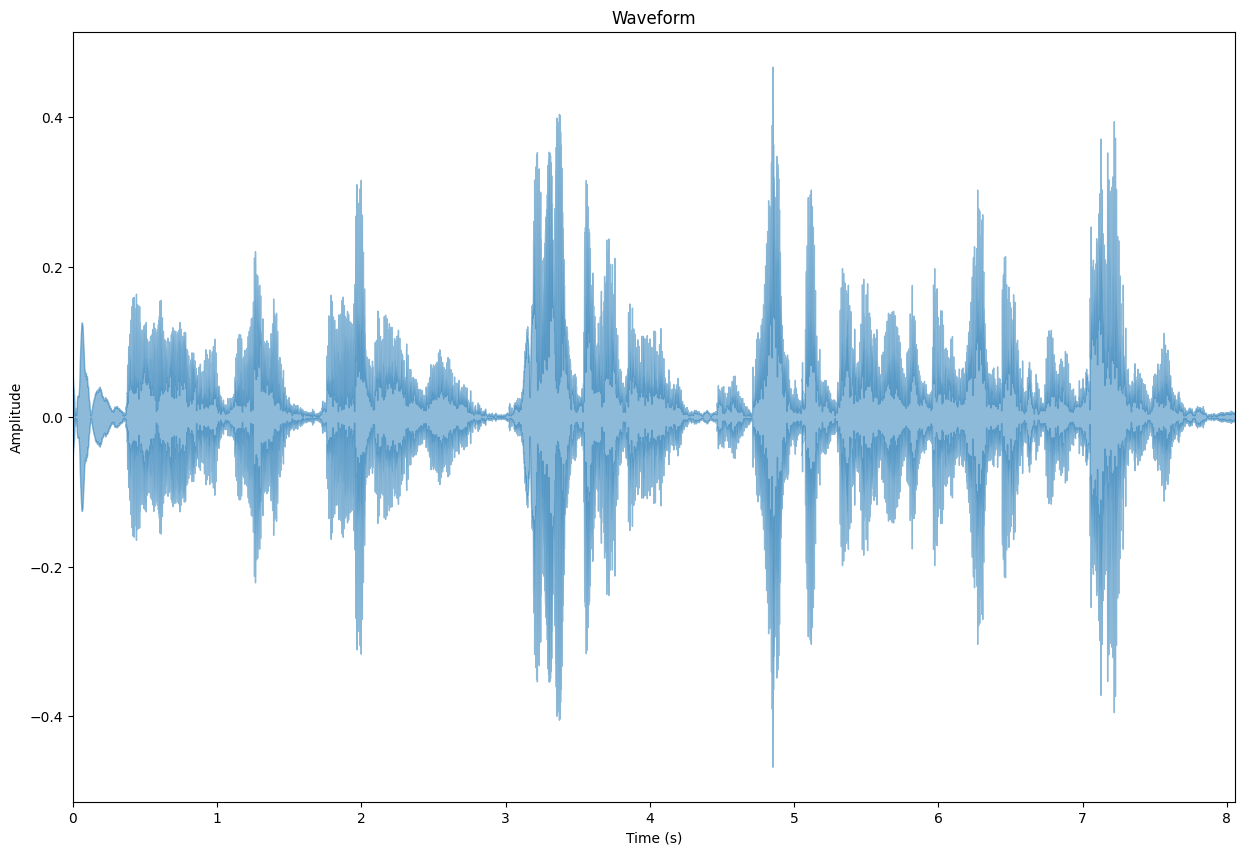

In [183]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Power spectrum')

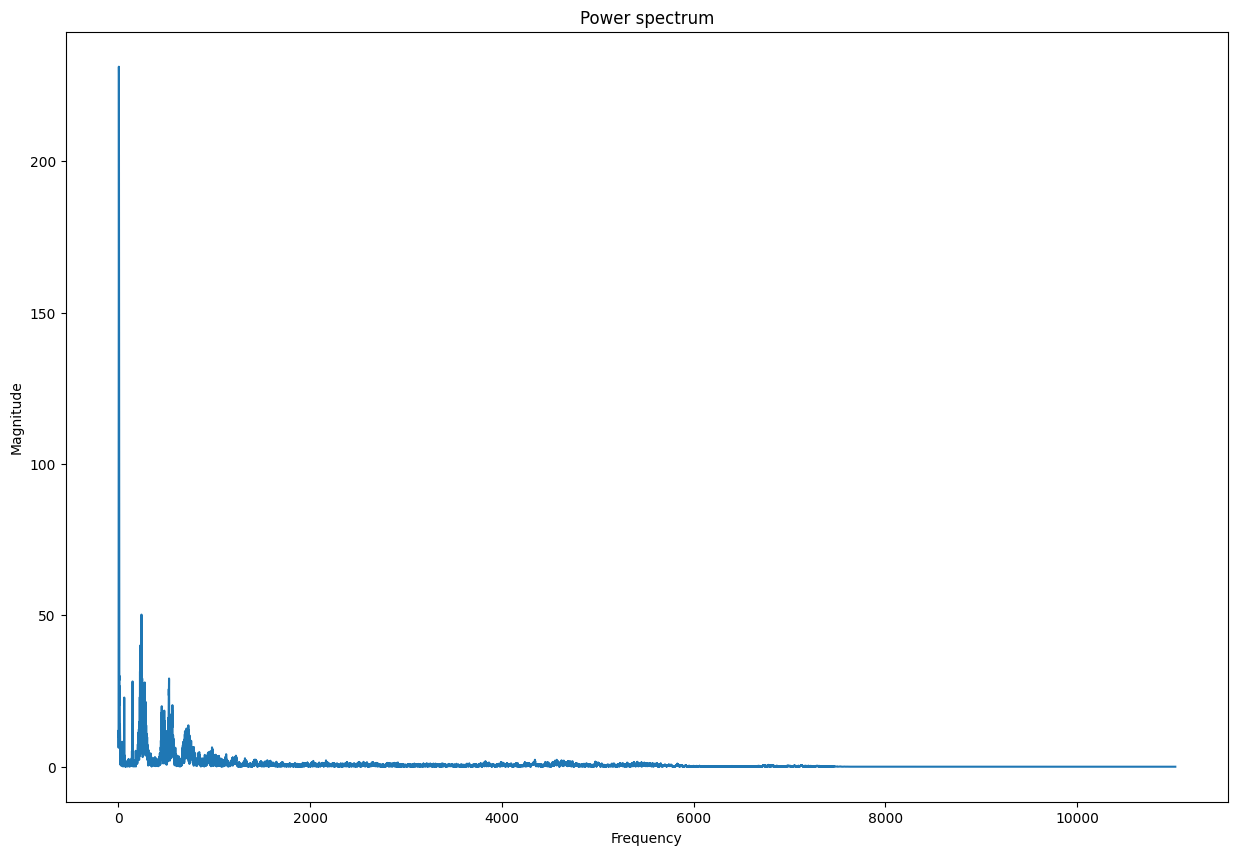

In [48]:
# 단순 퓨리에 변환
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Spectrogram (dB)')

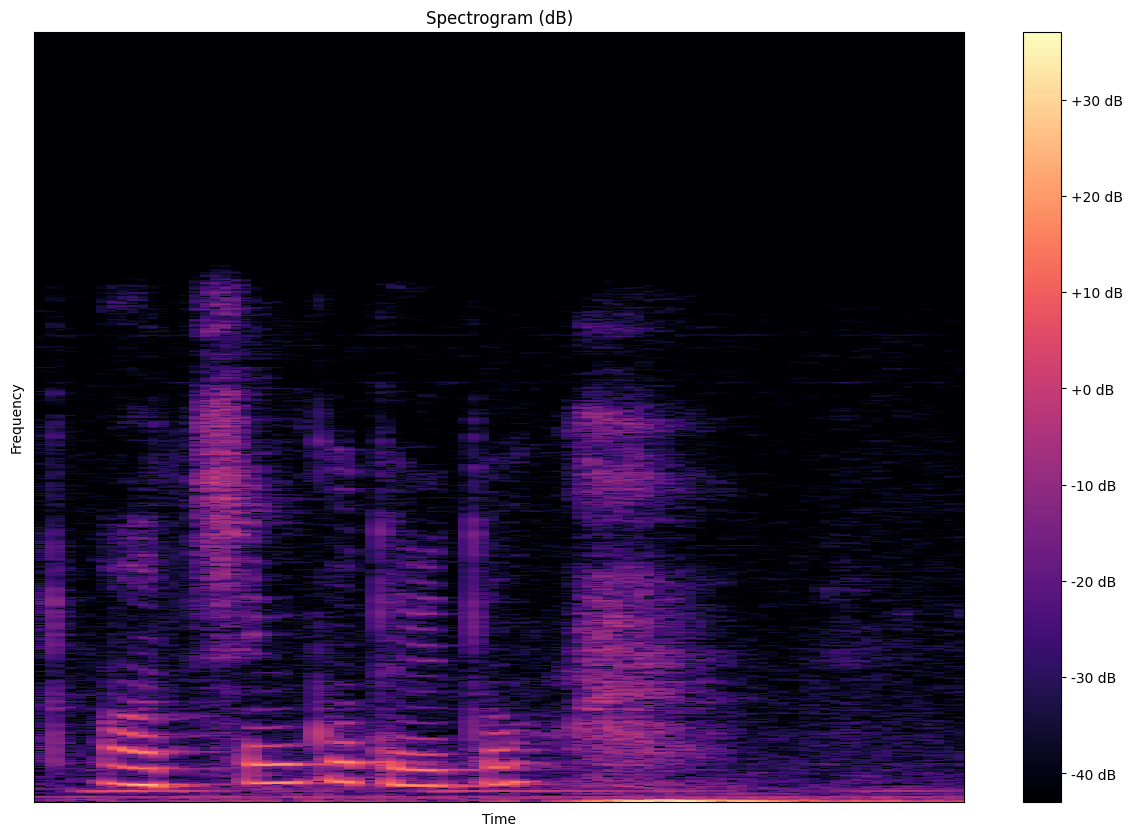

In [49]:
# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

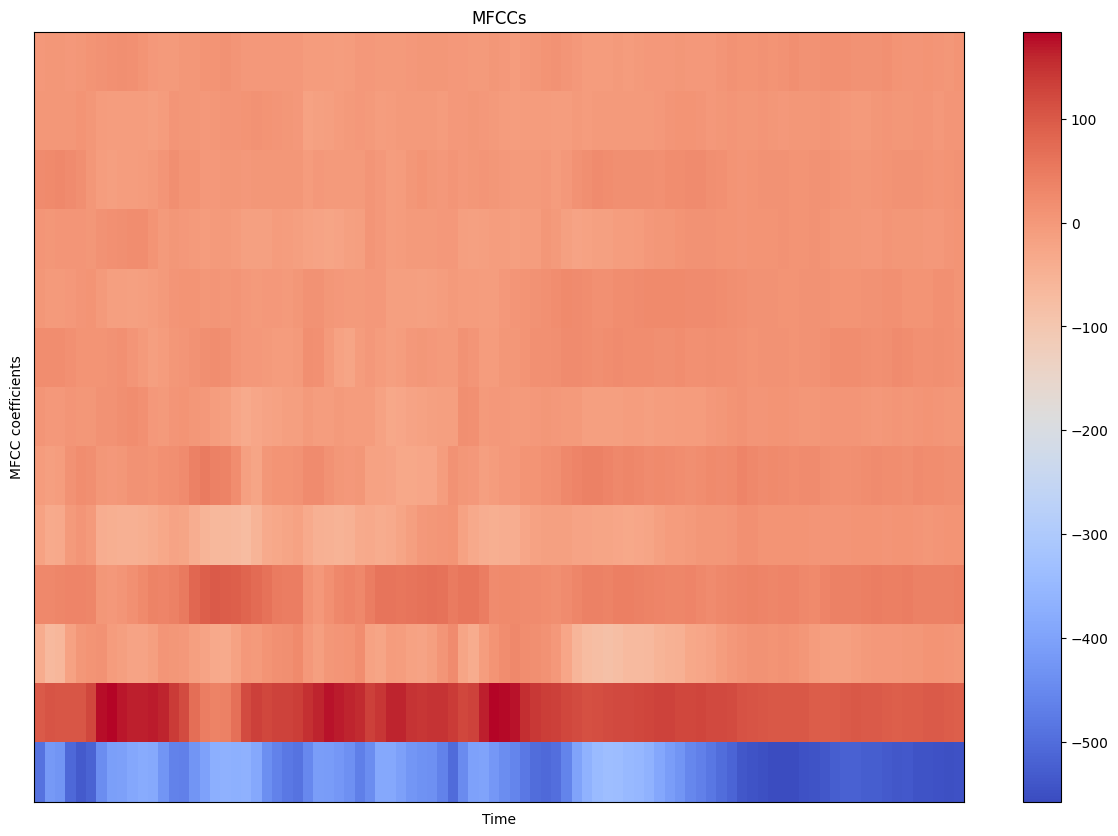

In [50]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [ ]:
DATASET_PATH = "/content/drive/My Drive/data/genres_Classification_data"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # sec
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION # 한 track의 sample 수

def save_mfcc(dataset_path,json_path, n_mfcc, n_fft, hop_length, n_segments ):
  # wav 파일에서 MFCC를 추출하고, 장르 라벨과 함께 json 파일로 저장하기 위한 함수
  # dataset_path (str): Path to dataset
  # json_path (str): Path to json file used to save MFCCs
  # n_mfcc (int): Number of coefficients to extract
  # n_fft (int): 한 frame 당 sample 수
  # hop_length (int): 겹치는 frame의 sample 수
  # n_segments (int): 트랙자체를 split 시켜 데이터 Augmentation 효과를 주자  

  # mapping, labels, and MFCCs 를 저장할 data라는 딕셔너리 생성
  data = { "mapping": [],"labels": [],"mfcc": [] }
  
  samples_per_segment = int(SAMPLES_PER_TRACK / n_segments) # track 전체 sample을 segment 수로 나눠서, segment 당 sample 수 정의
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length) # 굿노트 필기 

    # 모든 sub 폴더에 대해 loop 
  for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)): # eumerate 안에 argument를 풀어 매 iter 마다 인덱스와 결과값을 출력
                                                                            # dirpath : 현재 경로, dirnames : 현재 경로상에 디렉토리 목록, filenames : 현재 경로상에 파일 목록 
    if dirpath is not dataset_path:
    
      
      genre_label = dirpath.split("/")[-1]
      data["mapping"].append(genre_label)
      print("\n Processing : {}".format(genre_label))

        # 각 장르 폴더 밑에, 음원 파일 precessing
      for f in filenames:
          
        file_path = os.path.join(dirpath,f) # 현재 dirpath와 file 이름을 경로명으로 이어준다
        sig, sr = librosa.load(file_path, sr=SAMPLE_RATE)

          # Augmentation을 위해 segment 하므로, 각 segment에 대한 processing
        for d in range(n_segments):

            # 각 segment의 시작, 끝 점을 지정
          start = samples_per_segment * d 
          finish = start + samples_per_segment

            # extract mfcc
          mfcc = librosa.feature.mfcc(sig[start:finish], sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
          mfcc = mfcc.T

            # input data 차원을 맞춰줘야 되기 때문에, 위에서 지정한 mfcc 차원에 맞으면 저장한다
          if len(mfcc) == num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist()) # mfcc는 넘파이 어레이 이므로, list로 바꿔서 append 해준다
            data["labels"].append(i-1)
            print("{}, segment:{}".format(file_path, d+1)) # 음원 파일 경로, 각 음원의 d 번째 segment
                  
  with open(json_path, "w") as fp:
    json.dump(data, fp, indent =4)


if __name__ == "__main__":
  save_mfcc(DATASET_PATH,JSON_PATH,13,2048,512,5)


In [186]:
class LogMelSpectrogram(tf.keras.layers.Layer):
    """Compute log-magnitude mel-scaled spectrograms."""

    def __init__(self, sample_rate, fft_size, hop_size, n_mels,
                 f_min=0.0, f_max=None, **kwargs):
        super(LogMelSpectrogram, self).__init__(**kwargs)
        self.sample_rate = sample_rate
        self.fft_size = fft_size
        self.hop_size = hop_size
        self.n_mels = n_mels
        self.f_min = f_min
        self.f_max = f_max if f_max else sample_rate / 2
        self.mel_filterbank = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins=self.n_mels,
            num_spectrogram_bins=fft_size // 2 + 1,
            sample_rate=self.sample_rate,
            lower_edge_hertz=self.f_min,
            upper_edge_hertz=self.f_max)

    def build(self, input_shape):
        self.non_trainable_weights.append(self.mel_filterbank)
        super(LogMelSpectrogram, self).build(input_shape)

    def call(self, waveforms):
        """Forward pass.
        Parameters
        ----------
        waveforms : tf.Tensor, shape = (None, n_samples)
            A Batch of mono waveforms.
        Returns
        -------
        log_mel_spectrograms : (tf.Tensor), shape = (None, time, freq, ch)
            The corresponding batch of log-mel-spectrograms
        """
        def _tf_log10(x):
            numerator = tf.math.log(x)
            denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
            return numerator / denominator

        def power_to_db(magnitude, amin=1e-16, top_db=80.0):
            """
            https://librosa.github.io/librosa/generated/librosa.core.power_to_db.html
            """
            ref_value = tf.reduce_max(magnitude)
            log_spec = 10.0 * _tf_log10(tf.maximum(amin, magnitude))
            log_spec -= 10.0 * _tf_log10(tf.maximum(amin, ref_value))
            log_spec = tf.maximum(log_spec, tf.reduce_max(log_spec) - top_db)

            return log_spec

        spectrograms = tf.signal.stft(waveforms,
                                      frame_length=self.fft_size,
                                      frame_step=self.hop_size,
                                      pad_end=False)

        magnitude_spectrograms = tf.abs(spectrograms)

        mel_spectrograms = tf.matmul(tf.square(magnitude_spectrograms),
                                     self.mel_filterbank)

        log_mel_spectrograms = power_to_db(mel_spectrograms)

        # add channel dimension
        log_mel_spectrograms = tf.expand_dims(log_mel_spectrograms, 3)

        return log_mel_spectrograms

    def get_config(self):
        config = {
            'fft_size': self.fft_size,
            'hop_size': self.hop_size,
            'n_mels': self.n_mels,
            'sample_rate': self.sample_rate,
            'f_min': self.f_min,
            'f_max': self.f_max,
        }
        config.update(super(LogMelSpectrogram, self).get_config())

        return config

NameError: name 'tf' is not defined